In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns

from kuramoto import Kuramoto, plot_activity, plot_phase_coherence

sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.6)

### Instantiate a small world graph and transform into an adjacency matrix

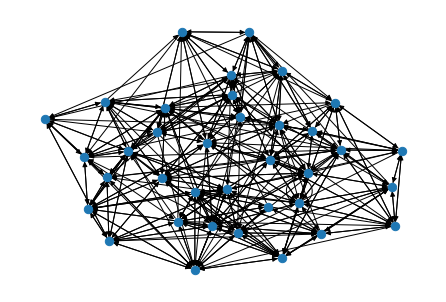

In [8]:
side = 6
sw = nx.navigable_small_world_graph(side, p=2, q=side//2, r=0.01)
options = {
    'node_size': 70,
    'width': 1,
}
nx.draw(sw, **options)

In [13]:
side = 10
n = side**2
graph_nx = nx.navigable_small_world_graph(side, p=3, q=5, r=0.01, seed=5)
graph = nx.to_numpy_array(graph_nx)

### Instantiate model with parameters

In [14]:
model = Kuramoto(coupling=3, dt=0.01, T=10, n_nodes=len(graph))                 

### Run simulation - output is time series for all nodes (node vs time)

In [15]:
act_mat = model.run(adj_mat=graph)
print(act_mat.shape)

(100, 1000)


### Plot all the time series

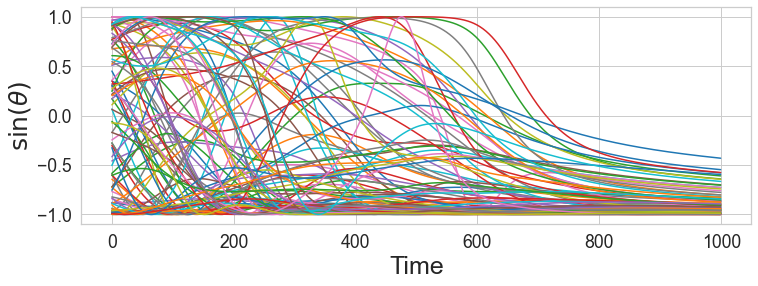

In [16]:
plot_activity(act_mat);

### Plot evolution of order global order parameter $R_t$

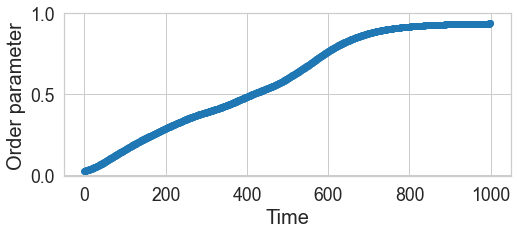

In [17]:
plot_phase_coherence(act_mat);

### Plot oscillators in complex plane at different times

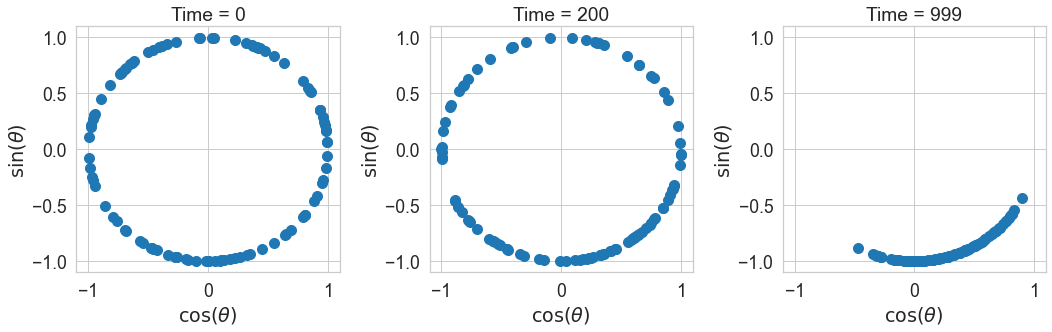

In [18]:
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(15, 5),
                         subplot_kw={
                             "ylim": (-1.1, 1.1),
                             "xlim": (-1.1, 1.1),
                             "xlabel": r'$\cos(\theta)$',
                             "ylabel": r'$\sin(\theta)$',                             
                         })

times = [0, 200, 999]
for ax, time in zip(axes, times):
    ax.plot(np.cos(act_mat[:, time]), 
            np.sin(act_mat[:, time]), 
            'o', 
            markersize=10)
    ax.set_title(f'Time = {time}')
plt.tight_layout()